# Log on 2017/12/11: Type-A ACC noise study

*** (Reconsideration) *** Accelerometers (ACCs) for Type-A suspension control don't have good enough performance for sensor blending so far.

### Table of contents
1. [Target](#target)
2. [Displacement sensor noise](#sensor-noise)
3. [Displacement in free run](#free-run)
4. [Acceleration output](#acc-output)

------

## Target <a name="target"></a>
 * To achieve noise level smaller than $3\times10^{-7}\;\mathrm{m/Hz^{1/2}@\,0.1\,Hz}$ for accelerometer's noise
  * It means that the accelerometer must be less noisy than Geophone L-4C in a frequency band around the microseismic peak (0.2-0.3 Hz)
  * Expected noise level is $\sim 3\times10^{-8}\;\mathrm{m/Hz^{1/2}@\,0.1\,Hz}$ (see the figure below)

**cf. TAMA accelerometer vs. Geophone L-4C (by R.Takahashi)** 
 <img src="./ACCvsL4C.png", width=450pt>


## Displacement sensor noise <a name="sensor-noise"></a>

The accelerometer's output noise seems to be dominated by contribution from the displacement sensor.
This sensor noise can be measured with its proof mass be fixed mechanically with a pin screw.
I measured the displacement sensor noise in 3 configurations of the cable connection between the ACC body and the driver (NIM module)
 * **LEMO shortest connection**: ACC connected with LEMO cables which were used in TAMA300
 * **Dsub9 10m-cable**: ACC connected with the KAGRA standard Dsub-9 male-female cables with length of 10m
 * **Dsub9 10m-cable (GND cared)**: Basically same as one above, but 5th-pin is shorted to the driver's GND
 

In [2]:
## IMPORT MODULE
import numpy as np
import oktpy as ok     # Homemade module by K.Okutomi

## LOAD DATA
dataNoiseLEMO = ok.loaddata('psdACC7fixed20171207v3.txt')
dataNoiseDsub = ok.loaddata('psdACC7fixed20171207v5.txt')
dataFreeLEMO = ok.loaddata('psdACC7free20171207v3.txt')
dataAccLEMO = ok.loaddata('psdACC7locked20171207v4.txt')

***** LOADED DATA *****
# 0: psdACC7fixed20171207v3.txt
***** LOADED DATA *****
# 0: psdACC7fixed20171207v5.txt
***** LOADED DATA *****
# 0: psdACC7free20171207v3.txt
***** LOADED DATA *****
# 0: psdACC7locked20171207v4.txt


Function "scale" applied to only the 1st column (0th left as it is)
Function "scale" applied to only the 1st column (0th left as it is)


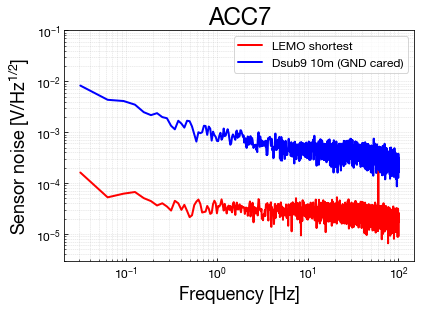

In [4]:
## PLOT SENSOR NOISE IN [V/rtHz]
cnt2volt = 20/65536.0

# Multiplying a facor of 2 compensates differential signal acquisiton on ADCs
# Setup 1: LEMO shortest connection
snoiseLEMO = ok.scale(dataNoiseLEMO[:, np.array([0, 2])], cnt2volt * 2)

# Setup 3: Dsub9 10m-cable connection with 5th-pin shorted to Driver's GND
snoiseDsub = ok.scale(dataNoiseDsub[:, np.array([0, 2])], cnt2volt * 2)

ok.plotpsd([snoiseLEMO, snoiseDsub],
           ylabel=r'Sensor noise $\mathrm{[V/Hz^{1/2}}]}$',
           legend=['LEMO shortest', 'Dsub9 10m (GND cared)'], legendFontsize=12,
           ylim=[3e-6, 1e-1], title='ACC7', save='psdACC7sensNoise20171211.png')

### Comparison
| **Cable configuration** | Noise @ 0.1 Hz $\mathrm{[V/Hz^{1/2}]}$ | Noise @ 10 Hz $\mathrm{[V/Hz^{1/2}]}$ |
|---|:---:|:---:|
| LEMO Shortest          | $6\times10^{-5}$ | $3\times10^{-5}$ |
| Dsub9 10m (GND cared)  | $4\times10^{-3}$ | $6\times10^{-4}$ |
| cf. In TAMA300 initial | $2\times10^{-2}$ | $2\times10^{-2}$ |
| cf. In TAMA300 revised | $3\times10^{-3}$ | $2\times10^{-4}$ |

Note: In the TAMA300 experiment, the cable connections of the displacement sensor (OSC_IN and DISP_OUT) might be swapped each other

## Displacement in free run <a name="free-run"></a>

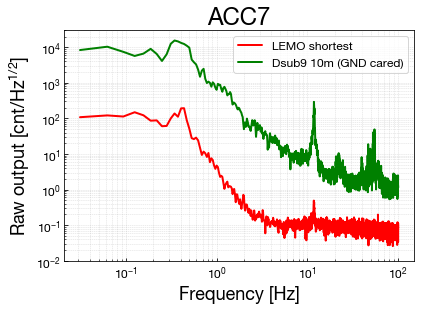

In [24]:
## PLOT DISPLACEMENT SPECTRA IN FREE RUN (SERVO OFF)
# Setup 1: LEMO shortest connection
freeDisp1 = psdFreeDisp[:, np.array([0, 1])]

# Setup 2: Dsub9 10m-cable connection (same in the past)
freeDisp2 = psdFreeDisp[:, np.array([0, 2])]

ok.plotpsd([freeDisp1, freeDisp2],linecolor=[0, 'g'],
           ylabel=r'Raw output $\mathrm{[cnt/Hz^{1/2}}]}$',
           legend=['LEMO shortest', 'Dsub9 10m (GND cared)'], legendFontsize=12,
           ylim=[1e-2, 3e4], title='ACC7', save='psdACC7freeCmpr20171207.png')

Data with the Dsub-9 10m-cable conenction has worse noise floor than that with the LEMO shortest conenction, but **its S/N ratio of the displacement signal is not spoiled** (ignoring the characteristics above 10 Hz.)

## Acceleration output <a name="acc-output"></a>

Acceleration of the mounted place (a working table this time) is obtained as the feedback singals of the folded pendulum position control. Only in the setup with LEMO shortest connection the acceleration is measured so far.

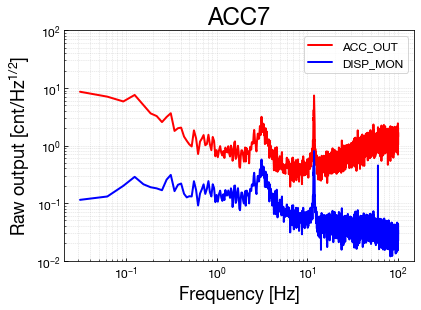

In [8]:
## PLOT ACCELERATION SPECTRUM
accOut = dataAccLEMO[:, np.array([0, 1])]
accMon = dataAccLEMO[:, np.array([0, 2])]

ok.plotpsd([accOut, accMon],
           ylabel=r'Raw output $\mathrm{[cnt/Hz^{1/2}}]}$',
           legend=['ACC_OUT', 'DISP_MON'], legendFontsize=12,
           ylim=[1e-2, 1e2], title='ACC7')


### Add the sensor noise contribution plot
It is difficult to calibrate the displacement sensor alone from the servo locking. To estimate the contribution of the sensor noise in the accelerometer's output in terms of displacement spectrum $\mathrm{[m/Hz^{1/2}]}$, I calculate the transfer function from DISP_MON to ACC_OUT and get the sensor noise contribution in following step.
 * DISP_MON x transferFunction(ACC_OUT/DISP_MON) => sensor noise in ACC_OUT $\mathrm{[cnt/Hz^{1/2}]}$
 * $\mathrm{[cnt/Hz^{1/2}]}$ x calibfactor $\mathrm{[(m/s^2)/cnt]}$ => sensor noise in ACC_OUT $\mathrm{[(m/s^2)/Hz^{1/2}]}$
 * Double integration => sensor noise in ACC_OUT $\mathrm{[m//Hz^{1/2}]}$

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  


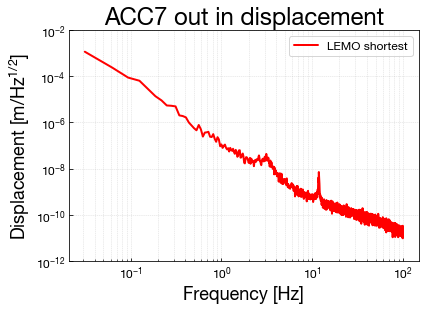

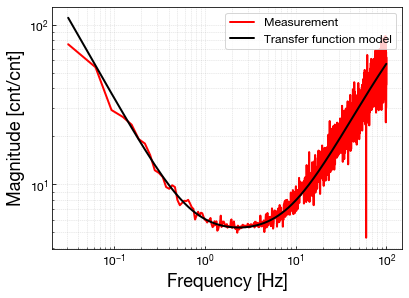

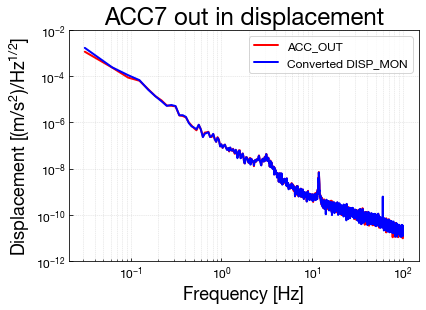

In [28]:
calibAcc7 = 5.288e-6                    # Cablibration factor [(m/s^2)/cnt]
accInDisp = accOut[:, 1] * calibAcc7 / (2*np.pi)**2 / accOut[:, 0]**2    # Displacement spectrum [m/rtHz]
accInDisp = np.vstack([accOut[:, 0], accInDisp]).transpose()
ok.plotpsd([accInDisp],
           ylabel=r'Displacement $\mathrm{[m/Hz^{1/2}}]}$',
           legend=['LEMO shortest'], legendFontsize=12,
           ylim=[1e-12, 1e-2], title='ACC7 out in displacement', save='psdACC7locked20171207.png')

## TRANSFER FUNCTION FROM DISP_MON TO ACC_OUT
meas_mon2acc = np.array([accOut[:, 0], accOut[:, 1]/accMon[:, 1]]).transpose()
tf_mon2acc = ok.Tf(zpk=[[0.7, 8], [0, 234], 144])
tf_mon2acc.samplefreq(accOut[:, 0])
tfgain_mon2acc = np.array([tf_mon2acc.f, tf_mon2acc.mag]).transpose()
ok.plotpsd([meas_mon2acc, tfgain_mon2acc], linecolor=[0, 'k'],
           ylabel='Magnitude [cnt/cnt]',
           legend=['Measurement', 'Transfer function model'], legendFontsize=12.)

## CONFIRMATION
accMonInDisp = accMon[:, 1] * tfgain_mon2acc[:, 1] * calibAcc7 / (2*np.pi)**2 / accMon[:, 0]**2
accMonInDisp = np.vstack([accMon[:, 0], accMonInDisp]).transpose()
ok.plotpsd([accInDisp, accMonInDisp],
           ylabel=r'Displacement $\mathrm{[(m/s^2)/Hz^{1/2}}]}$',
           legend=['ACC_OUT', 'Converted DISP_MON'], legendFontsize=12,
           ylim=[1e-12, 1e-2], title='ACC7 out in displacement')

The signal regarded as the displacement sensor output (DISP_OUT) will be converted to the acceleration output (ACC_OUT) through this servo filter shown above. Using this transfer function, we can plot a noise curve contributed from the displacement sensor even we don't have the calibration factor of the sensor.

Function "scale" applied to only the 1st column (0th left as it is)
Function "scale" applied to only the 1st column (0th left as it is)


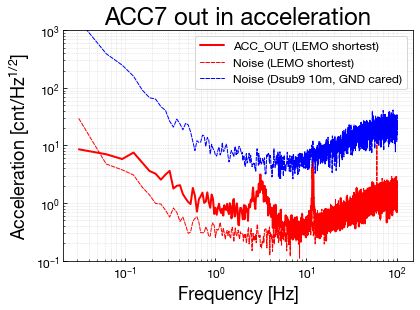

Function "scale" applied to only the 1st column (0th left as it is)
Function "scale" applied to only the 1st column (0th left as it is)
Function "scale" applied to only the 1st column (0th left as it is)
Function "scale" applied to only the 1st column (0th left as it is)
Function "scale" applied to only the 1st column (0th left as it is)
Function "scale" applied to only the 1st column (0th left as it is)


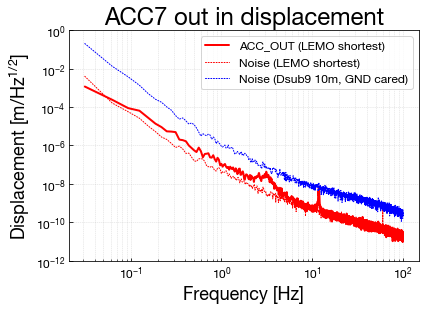

In [27]:
snoiseLEMOout = ok.scale(dataNoiseLEMO[:, np.array([0, 2])], tfgain_mon2acc[:, 1])
snoiseDsubOut = ok.scale(dataNoiseDsub[:, np.array([0, 2])], tfgain_mon2acc[:, 1])

ok.plotpsd([accOut, snoiseLEMOout, snoiseDsubOut], linestyle=[0, '--', '--'],
           linewidth=[0, 1, 1], linecolor=[0, 'r', 'b'],
           ylabel=r'Acceleration $\mathrm{[cnt/Hz^{1/2}}]}$',
           legend=['ACC_OUT (LEMO shortest)', 'Noise (LEMO shortest)', 'Noise (Dsub9 10m, GND cared)'], legendFontsize=12,
           ylim=[1e-1, 1e3], title='ACC7 out in acceleration')

snoiseLEMOinDisp = ok.calibacc(snoiseLEMOout, calib=calibAcc7/2.0)
snoiseDsubInDisp = ok.calibacc(snoiseDsubOut, calib=calibAcc7/2.0)

ok.plotpsd([accInDisp, snoiseLEMOinDisp, snoiseDsubInDisp],
           linestyle=[0, ':', ':'], linewidth=[0, 1, 1], linecolor=[0, 'r', 'b'],
           ylabel=r'Displacement $\mathrm{[m/Hz^{1/2}}]}$',
           legend=['ACC_OUT (LEMO shortest)', 'Noise (LEMO shortest)', 'Noise (Dsub9 10m, GND cared)'], legendFontsize=12,
           ylim=[1e-12, 1e0], title='ACC7 out in displacement')


Function "scale" applied to only the 1st column (0th left as it is)
Function "scale" applied to only the 1st column (0th left as it is)
Function "scale" applied to only the 1st column (0th left as it is)
Function "scale" applied to only the 1st column (0th left as it is)


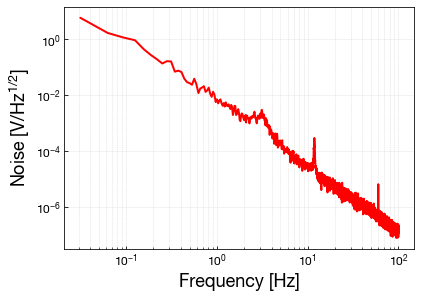

In [88]:
accMonInVolt = ok.scale(ok.calibacc(accMon, calib=1), cnt2volt)
ok.plotpsd(accMon2, ylabel='Noise $\mathrm{[V/Hz^{1/2}]}$')

In [93]:
accMonInVolt[32, :]

array([  1.00000000e+00,   2.14430741e-06])

In [95]:
accInDisp[32, :]

array([  1.00000000e+00,   2.22797880e-07])

In [99]:
effDispSensor = accMonInVolt[32, 1]/accInDisp[32, 1]
print "Displacement sensor efficiency: %f [V/m]" % effDispSensor

Displacement sensor efficiency: 9.624452 [V/m]
